# Calibration Guide

The localisation have lots of room to improve and the main source of inaccuracy comes from the raspberry pi itself. How it detect the RSSI signals are very relative. Without doubt, RSSI signals can be very noisy, but we can improve the rpi reading of the RSSI. 

As of now, the RSSI to Distance formula is using a generic one:

In [ ]:
Distance = 10^((rssi - MeasuredPower)/(-10*N), N=2

Measured Power is defined as RSSI from 1m

2 Assumptions made in this generic formula:
- MeasuredPower is the same across all rpis at -60
- N=2

## 1. Calibrate by giving unique Measured Power

### calibrateAnchors.py
- in algorithm server
- run this script with 4 arguments: duration, beaconid, anchorid, distance in this order
- collect rssi packets over a certain duration and compute moving average rssi values
- After the duration ended, it will compute the Measured Power and will input into the postgres to modify the MP value for that anchorid
- general guide for distance is 1 or 2m and duration is 2 minutes

## 2. Calibrate by finding the anchor-to-anchor relationship

### calibrateDistance.py
- in analysis server
- run this script with 2 arguments: duration, anchorid
- need all the physical distances for every one-to-all anchors stored in _distances.json_
- general idea is one anchor become a beacon while the rest are receivers
- It will collect rssi packets from the 2 neighboring anchor beside the transmitting anchor for 2 minutes
- And it will compute the average rssi for that particular anchor-anchor pairing
- These data will be written to a csv file
- After running the script each for every anchor, you can go ahead to plot out and compute the unique formula for each anchor-anchor relationship
- Do note that for every anchor, you will need to set it as a beacon
- To do so, you need to run _transmit.js_ in the rpi and the rest to run the normal _pulse.js script
- Once one anchor is done, you need to stop _transmit.js_ and run _pulse.js_ script for that anchor
- Do note that when calibration is run, barycentric localisation code cannot be run concurrently

- An example of the csv file that will be written

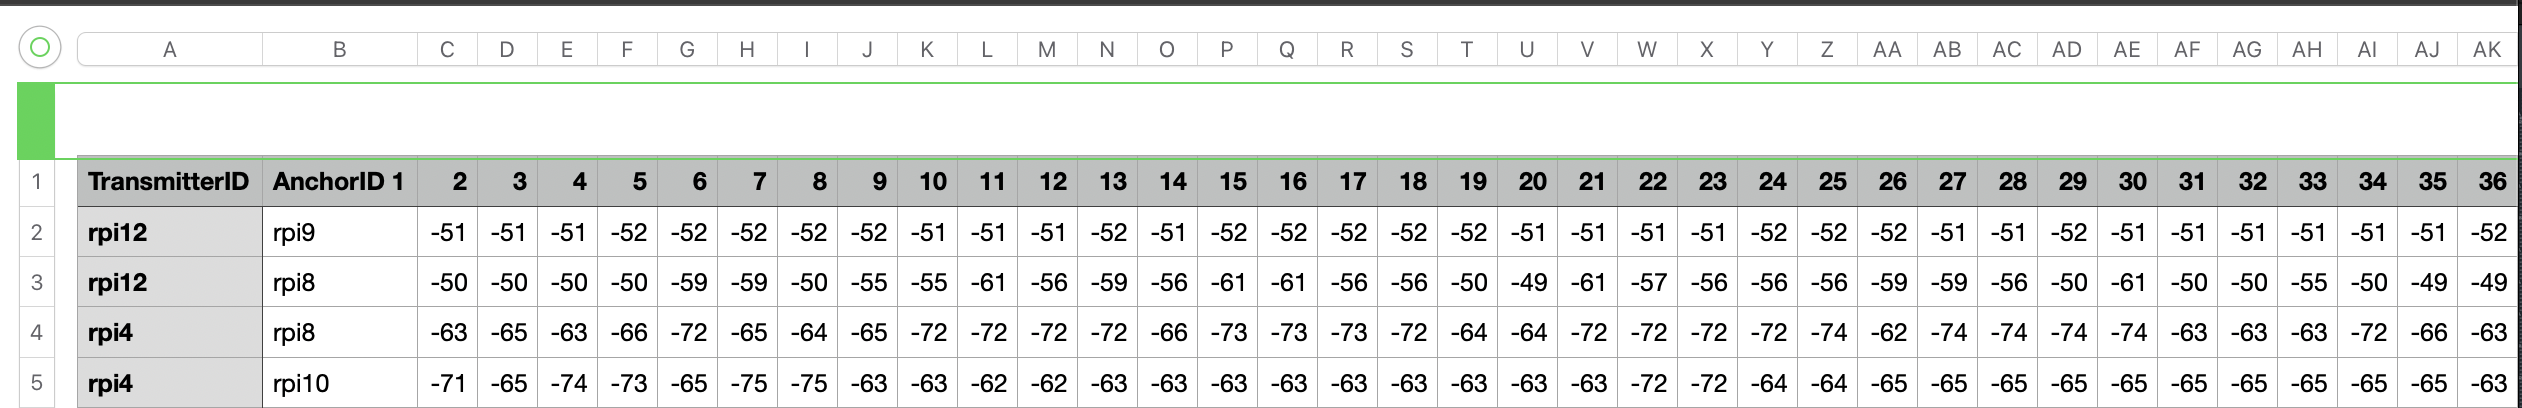

### Other Resources

Refer to Filter_Explanation.ipynb for demo of how the rssi filtering works, and Localisation_Analysis_Document.ipynb for how the calibration affects the result